In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import  PIL
from PIL import Image
import os
%matplotlib inline

In [31]:
VEHICLES = 10 # Data encoding in the segmented image
ROADS = 7
ROAD_LINES = 6

def isolate_cars(filename,i):
    img = Image.open(filename)

    img_np = np.array(img)

    img_np_R = img_np[:,:,0] # Pull out R channel

    img_np_R[img_np_R == VEHICLES] = 255    

    img_np_R[img_np_R != 255] = 0
    
    h,w = img_np_R.shape
    img_np_R[int(.82*h):h, :] = 0

    new_img = np.stack((img_np_R,img_np_R,img_np_R), axis=-1)
    
    image = Image.fromarray(new_img, 'RGB')
    dest = 'mask/'
    image.save(dest+str(i)+'.png')
    return image

In [32]:
i=0
for subdir, dirs, files in os.walk('lyft_training_data/Train/CameraSeg'):
    for file in files:
        isolate_cars(os.path.join(subdir, file),i)
        i=i+1

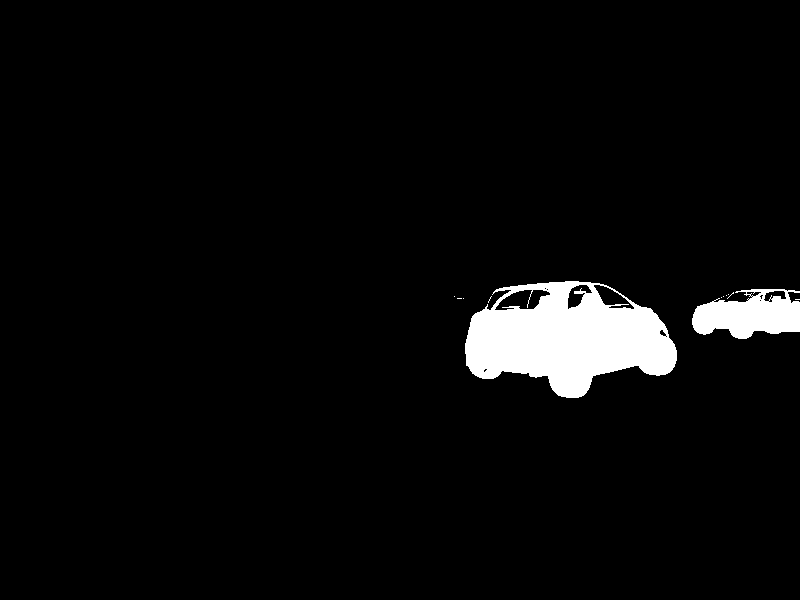

In [36]:
image=Image.open('mask/559.png')
image
